In [1]:
import torch
from pathlib import Path
import numpy as np
import pandas as pd
import random
from glob import glob
import sklearn

from tqdm.autonotebook import tqdm
from sklearn.metrics import average_precision_score, roc_auc_score
from pathlib import Path

#set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'

# opensoundscape transfer learning tools
from opensoundscape.ml.shallow_classifier import MLPClassifier, quick_fit, fit_classifier_on_embeddings


/tmp/ipykernel_5047/3831688300.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
train_labels = pd.read_csv('./data/train_labels_5s.csv', index_col = [0,1,2])
test_labels = pd.read_csv('./data/test_labels_5s.csv', index_col = [0,1,2])
test_labels.head()

Hypsipetes_madagascariensis  \
file                                               start_time end_time                                
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        5.0                             False   
                                                   5.0        10.0                            False   
                                                   10.0       15.0                            False   
                                                   15.0       20.0                            False   
                                                   20.0       25.0                            False   

                                                                        Copsychus_albospecularis  \
file                                               start_time end_time                             
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        5.0                          False   
                                                   5.0        10.0                         False   
                                                   10.0       15.0                         False   
                                                   15.0       20.0                         False   
                                                   20.0       25.0                         False   

                                                                        Coracopsis_nigra  \
file                                               start_time end_time                     
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        5.0                  False   
                                                   5.0        10.0                 False   
                                                   10.0       15.0                 False   
                                                   15.0       20.0                 False   
                                                   20.0       25.0                 False   

                                                                        Dicrurus_forficatus  \
file                                               start_time end_time                        
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        5.0                     False   
                                                   5.0        10.0                    False   
                                                   10.0       15.0                    False   
                                                   15.0       20.0                    False   
                                                   20.0       25.0                    False   

                                                                        Coua_caerulea  \
file                                               start_time end_time                  
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        5.0               False   
                                                   5.0        10.0              False   
                                                   10.0       15.0              False   
                                                   15.0       20.0              False   
                                                   20.0       25.0              False   

                                                                        Zosterops_maderaspatanus  \
file                                               start_time end_time                             
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        5.0                          False   
                                                   5.0        10.0                         False   
                                                   10.0       15.0                         False   
                                                   15.0       20.0                         False   
                                                   20.0       25.0                         False   

             

In [3]:
# pick classes to train the model on. These should occur in the annotated data
class_list = ['Hypsipetes_madagascariensis','Copsychus_albospecularis','Coracopsis_nigra','Dicrurus_forficatus','Coua_caerulea','Zosterops_maderaspatanus','Eurystomus_glaucurus','Agapornis_canus','Saxicola_torquatus','Cyanolanius_madagascarinus','Leptopterus_chabert','Nesoenas_picturatus','Coua_reynaudii','Ceblepyris_cinereus','Neodrepanis_coruscans','Philepitta_castanea','Eulemur_sp','Coua_cristata','Treron_australis']


In [4]:
from bioacoustics_model_zoo import Perch

In [22]:
#specify the name of the file you want to load
filename = 'Shallow_classifier_perch_fixed'

In [23]:
perch_model = Perch.load(f'/mnt/class_data/group1_bioacoustics/sheila/Perch/{filename}.model')

/home/Sheila/miniconda3/envs/rewilding_tensorflow/lib/python3.10/site-packages/bioacoustics_model_zoo/tensorflow_wrapper.py:223: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


In [24]:
perch_model.use_custom_classifier

True

In [25]:
# make predictions by passing the embeddings through the classifier
preds = perch_model.predict(test_labels,batch_size=64)

preds

  0%|          | 0/24 [00:00<?, ?it/s]

2025-03-19 09:34:34.856117: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:38] Ignoring Assert operator jax2tf_infer_fn_/assert_equal_1/Assert/AssertGuard/Assert
W0000 00:00:1742376877.410525    5047 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
2025-03-19 09:34:51.015456: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:38] Ignoring Assert operator jax2tf_infer_fn_/assert_equal_1/Assert/AssertGuard/Assert


Hypsipetes_madagascariensis  \
file                                               start_time end_time                                
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        5.0                         -4.079738   
                                                   5.0        10.0                        -4.059158   
                                                   10.0       15.0                        -4.512159   
                                                   15.0       20.0                        -2.910311   
                                                   20.0       25.0                        -3.242932   
...                                                                                             ...   
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 35.0       40.0                        -1.282262   
                                                   40.0       45.0                        -1.913185   
                                                   45.0       50.0                        -1.395470   
                                                   50.0       55.0                        -2.460848   
                                                   55.0       60.0                        -0.694359   

                                                                        Copsychus_albospecularis  \
file                                               start_time end_time                             
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        5.0                      -5.917579   
                                                   5.0        10.0                     -5.084950   
                                                   10.0       15.0                     -4.349007   
                                                   15.0       20.0                     -5.690140   
                                                   20.0       25.0                     -5.312395   
...                                                                                          ...   
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 35.0       40.0                     -5.492503   
                                                   40.0       45.0                     -6.187714   
                                                   45.0       50.0                     -5.774028   
                                                   50.0       55.0                     -5.776912   
                                                   55.0       60.0                     -6.633046   

                                                                        Coracopsis_nigra  \
file                                               start_time end_time                     
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 0.0        5.0              -4.703196   
                                                   5.0        10.0             -5.066337   
                                                   10.0       15.0             -5.468271   
                                                   15.0       20.0             -5.407727   
                                                   20.0       25.0             -5.725328   
...                                                                                  ...   
/mnt/class_data/group1_bioacoustics/sheila/cv4e... 35.0       40.0             -4.784329   
                                                   40.0       45.0             -5.178525   
                                                   45.0       50.0             -5.885524   
                                                   50.0       55.0             -5.471916   
                                                   55.0       60.0             -4.227007   

                                                                        Dicrurus_forficatus  \
file                                               start_time end_time                        
/mnt/class_data/group1_bioacoustics/sheila/c

/home/Sheila/miniconda3/envs/rewilding_tensorflow/lib/python3.10/site-packages/matplotlib/axes/_axes.py:7065: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/Sheila/miniconda3/envs/rewilding_tensorflow/lib/python3.10/site-packages/matplotlib/axes/_axes.py:7066: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/home/Sheila/miniconda3/envs/rewilding_tensorflow/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/home/Sheila/miniconda3/envs/rewilding_tensorflow/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/home/Sheila/miniconda3/envs/rewilding_tensorflow/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present 

array([0.97007803, 0.99677063, 0.98919793, 0.97882188, 0.99585349,
       0.9901835 , 0.98249119, 0.95682902, 0.99936905, 0.91801496,
       0.65465619,        nan, 0.99966033, 0.87863464, 0.98983051,
              nan, 0.91663828, 0.84079376,        nan])

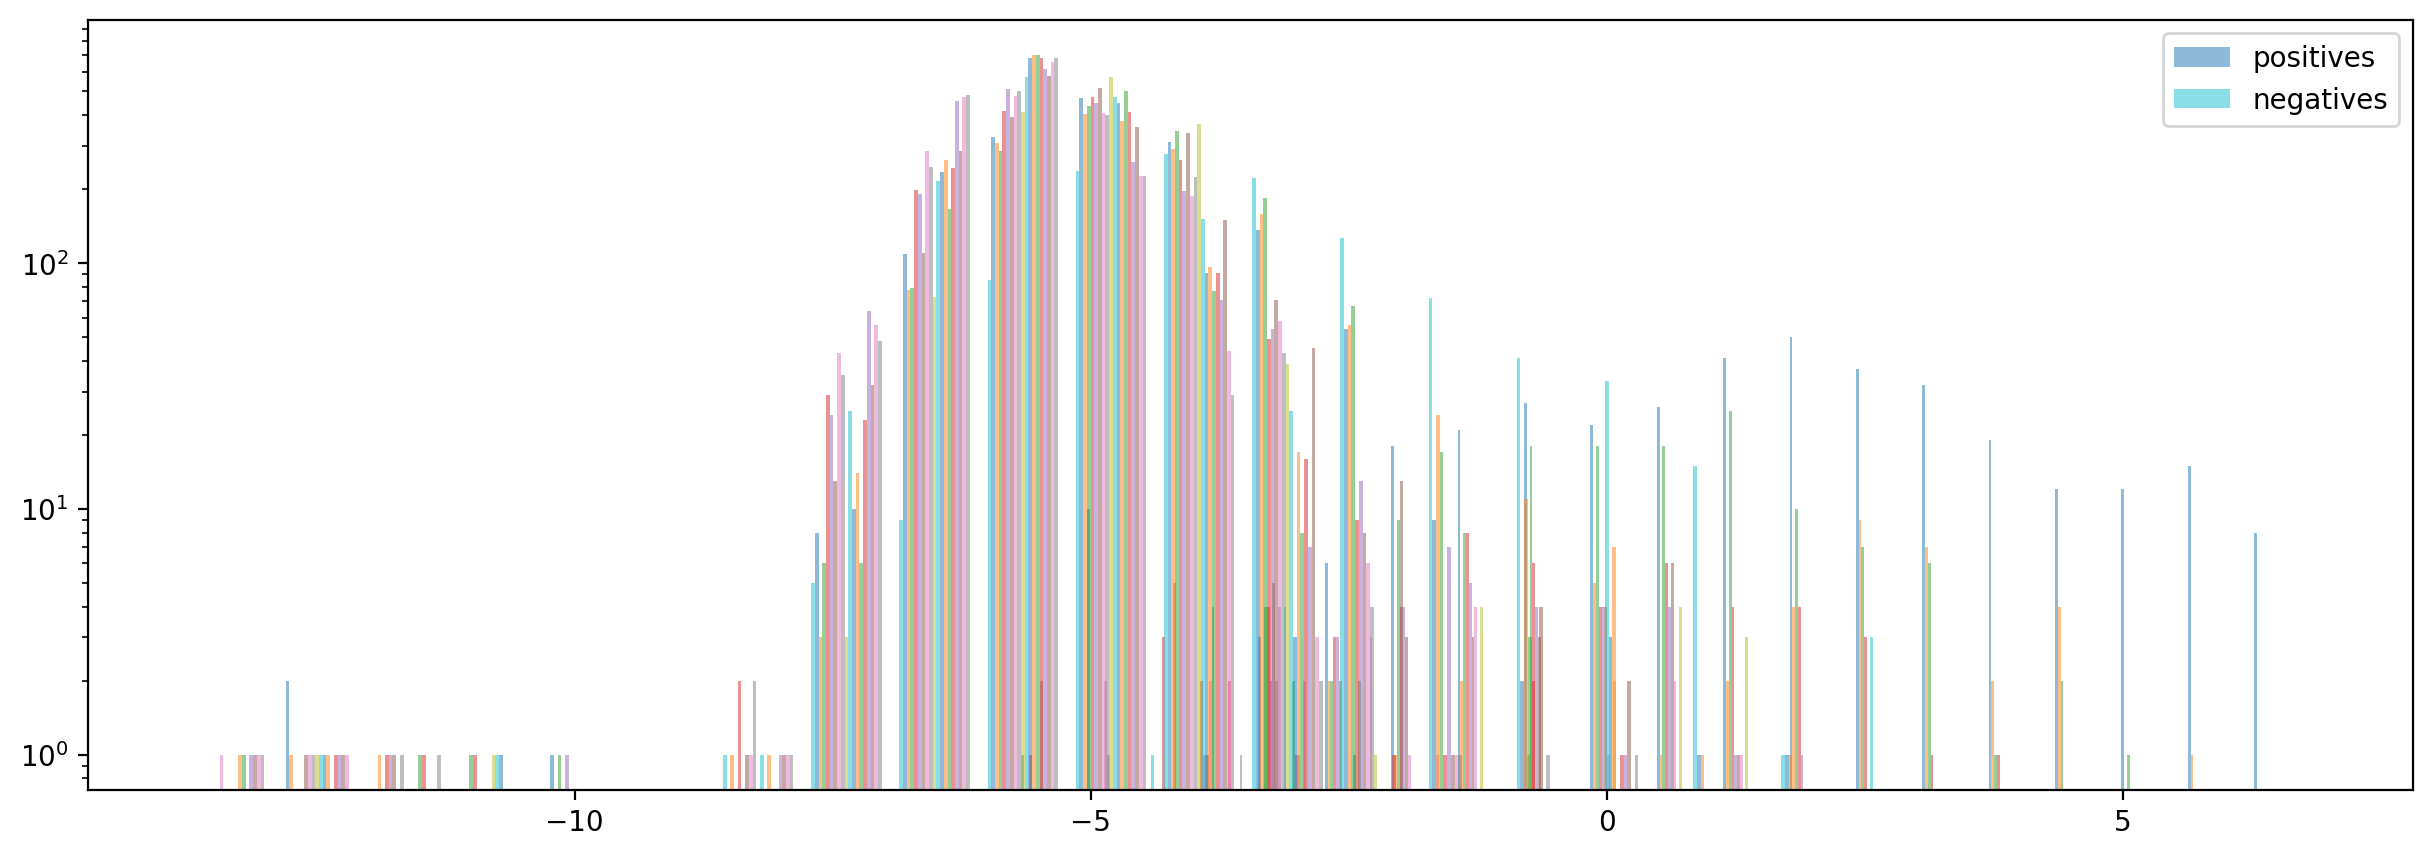

In [26]:

# plot histogram of scores for positive and negative clips
plt.hist(preds[test_labels==True],bins=20,alpha=0.5,label='positives')
plt.hist(preds[test_labels==False],bins=20,alpha=0.5,label='negatives')
plt.legend()
plt.semilogy()

# calculate the area under the ROC score
roc_auc_score(test_labels.values,preds,average=None)

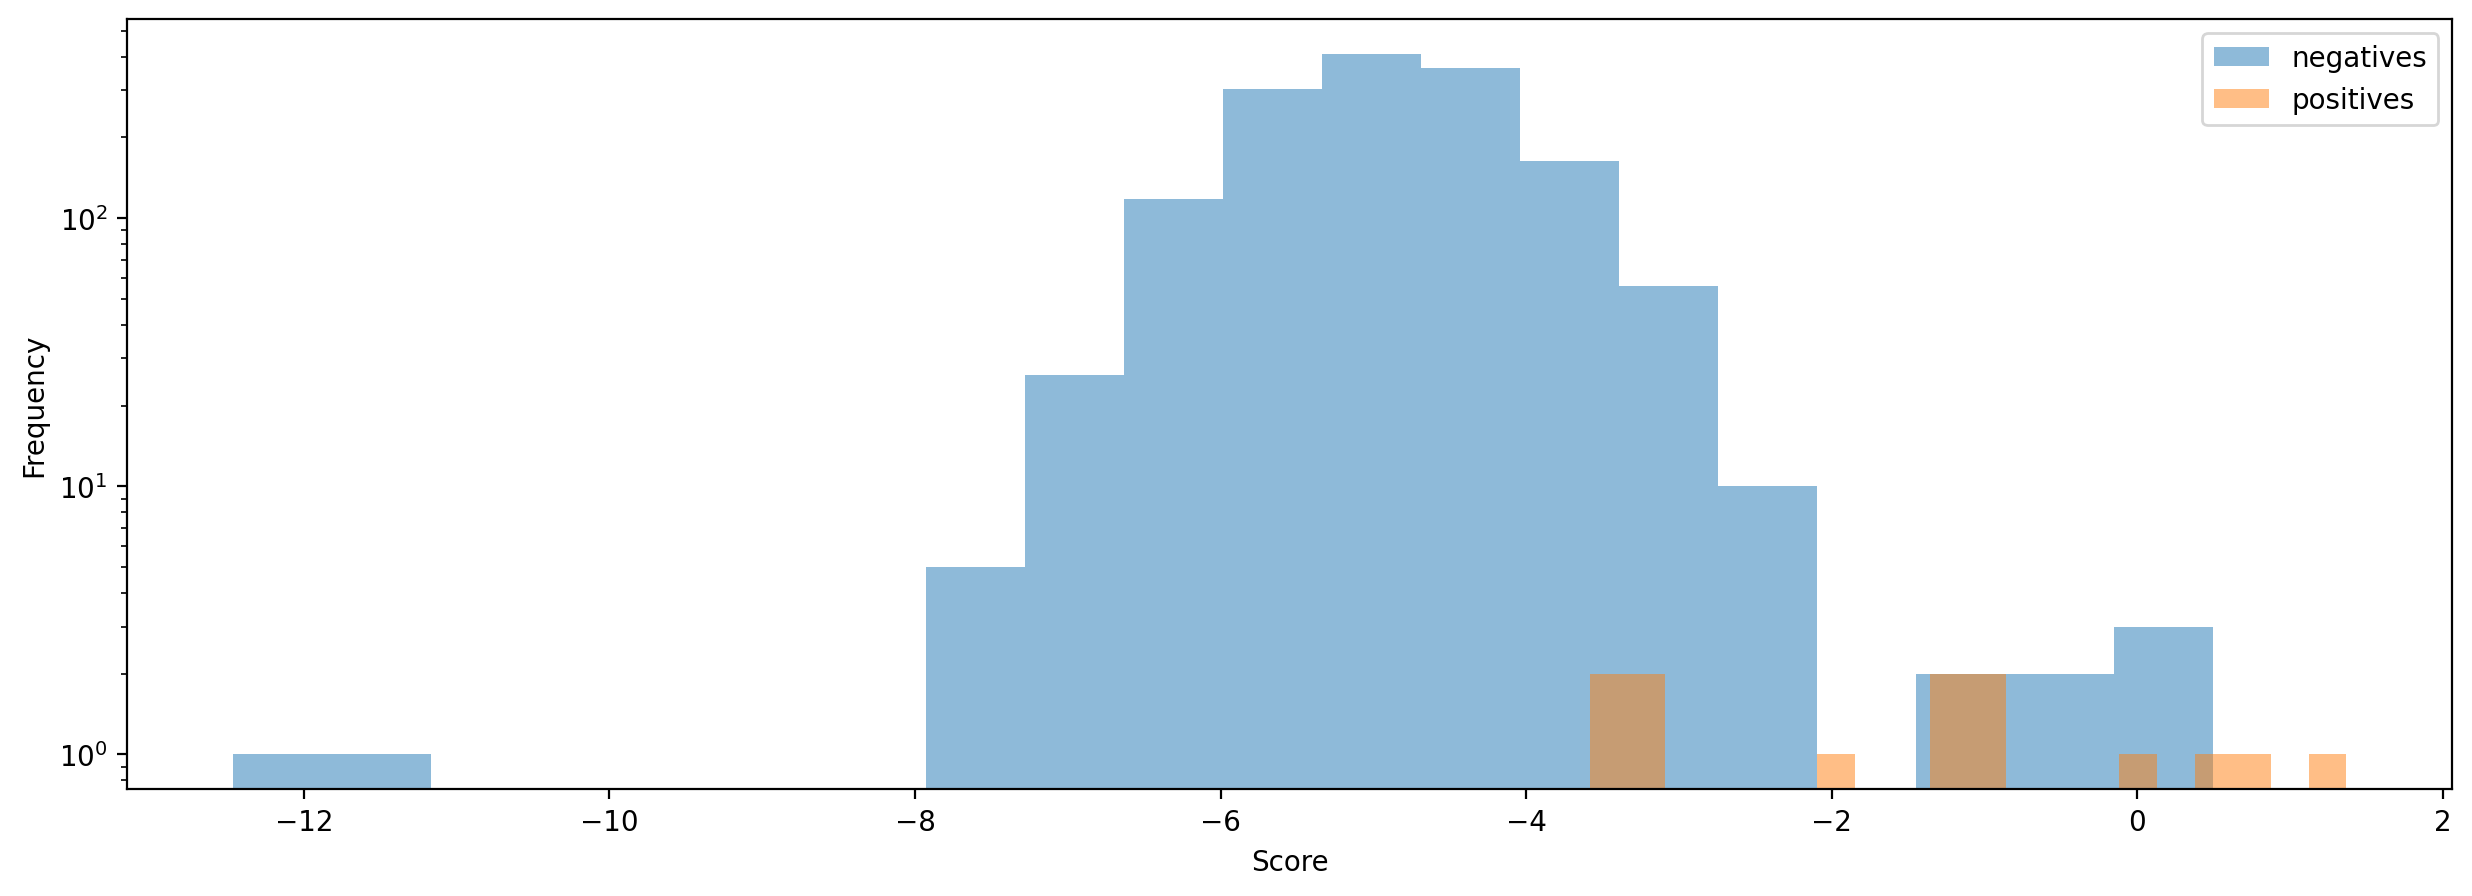

In [33]:
histspecies = 'Eurystomus_glaucurus'
# Filter
df_Pos = preds[test_labels==True]
df_NOT = preds[test_labels==False]
# Plot histograms
plt.hist(df_NOT[histspecies],bins=20,alpha=0.5,label='negatives')
plt.hist(df_Pos[histspecies],bins=20,alpha=0.5,label='positives')
# Add a legend and labels
plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.semilogy()
# Show the plot
plt.show()

In [28]:
#set up plotting
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'
#write a loop to cycle through the class list and save histograms for each species for the model read in at the top of this notebook
path = '/mnt/class_data/group1_bioacoustics/sheila/histograms'
for species in class_list:
    speciespred = species + 'pred'
    scores_test_df = test_labels.join(preds, rsuffix="pred")
    # Filter
    df_Pos = scores_test_df[scores_test_df[species] == True] #or whatever your class of interest is called
    df_NOT = scores_test_df[scores_test_df[species] == False]
    # Plot histograms
    plt.hist(df_NOT[speciespred],bins=20,alpha=0.5,label='negatives')
    plt.hist(df_Pos[speciespred],bins=20,alpha=0.5,label='positives')
    # Add a legend and labels
    plt.legend()
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    # Show the plot
    plt.savefig(f'/mnt/class_data/group1_bioacoustics/sheila/histograms/{filename}_{species}_test.png')
    plt.clf()

<Figure size 1500x500 with 0 Axes>

In [29]:
#set up plotting on log scale on y axis - easier to see small sample sizes
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for large visuals
%config InlineBackend.figure_format = 'retina'
#write a loop to cycle through the class list and save histograms for each species for the model read in at the top of this notebook
path = '/mnt/class_data/group1_bioacoustics/sheila/histograms'
for species in class_list:
    speciespred = species + 'pred'
    scores_test_df = test_labels.join(preds, rsuffix="pred")
    # Filter
    df_Pos = scores_test_df[scores_test_df[species] == True] #or whatever your class of interest is called
    df_NOT = scores_test_df[scores_test_df[species] == False]
    # Plot histograms
    plt.hist(df_NOT[speciespred],bins=20,alpha=0.5,label='negatives')
    plt.hist(df_Pos[speciespred],bins=20,alpha=0.5,label='positives')
    # Add a legend and labels
    plt.legend()
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.semilogy()
    # Save the plot
    plt.savefig(f'/mnt/class_data/group1_bioacoustics/sheila/histograms/semilog/{filename}_{species}_test.png')
    plt.clf()

<Figure size 1500x500 with 0 Axes>

In [30]:
avprecscore_auroc_by_sp = pd.DataFrame(columns=['species', 'avg_precision_score','auroc_score'])
for species in class_list:
    avgscore = sklearn.metrics.average_precision_score(test_labels [species],preds [species])
    auroc = sklearn.metrics.roc_auc_score(test_labels[species],preds [species])
    new_row = pd.DataFrame({'species': [species], 'avg_precision_score': [avgscore], 'auroc_score': [auroc]})
    avprecscore_auroc_by_sp = pd.concat([avprecscore_auroc_by_sp, new_row], ignore_index=True)

avprecscore_auroc_by_sp

/tmp/ipykernel_5047/1227905884.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  avprecscore_auroc_by_sp = pd.concat([avprecscore_auroc_by_sp, new_row], ignore_index=True)
/home/Sheila/miniconda3/envs/rewilding_tensorflow/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/home/Sheila/miniconda3/envs/rewilding_tensorflow/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/home/Sheila/miniconda3/envs/rewilding_tensorflow/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning

,species,avg_precision_score,auroc_score
0,Hypsipetes_madagascariensis,0.917664,0.970078
1,Copsychus_albospecularis,0.931891,0.996771
2,Coracopsis_nigra,0.907957,0.989198
3,Dicrurus_forficatus,0.817931,0.978822
4,Coua_caerulea,0.842433,0.995853
5,Zosterops_maderaspatanus,0.762313,0.990184
6,Eurystomus_glaucurus,0.502073,0.982491
7,Agapornis_canus,0.075594,0.956829
8,Saxicola_torquatus,0.929298,0.999369
9,Cyanolanius_madagascarinus,0.236372,0.918015


In [31]:
avprecscore_auroc_by_sp.to_csv(f'/mnt/class_data/group1_bioacoustics/sheila/results/{filename}_test.csv')